In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('data/final_data_first.csv')

In [14]:
x = df[['budget','dd_top5','Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Fantasy', 'Family', 'Horror',
       'Romance', 'Sci-Fi', 'Thriller','genre_top3']]

y = df['domestic_opening_sales']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2, random_state=10)

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2, random_state=3)

Text(0.5, 1.0, 'Budget versus domestic opening sales top movies from 2000 to 2020')

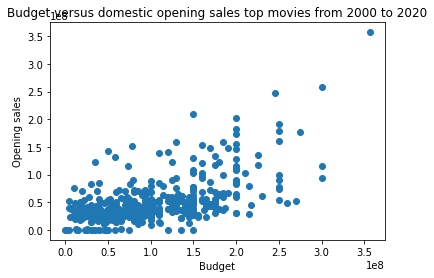

In [16]:
#fig, ax = plt.subplots(figsize=(9, 7))

budget_x = x_train['budget']
sales_y = y_train

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic opening sales top movies from 2000 to 2020')

In [6]:
x_train_df = pd.DataFrame(x_train, index=x_train.index)
x_val_df = pd.DataFrame(x_val, index=x_val.index)
x_test_df = pd.DataFrame(x_val, index=x_test.index)

In [7]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_val_scaled = scaler.transform(x_val.values)
x_test_scaled = scaler.transform(x_test.values)

In [8]:
lr = LinearRegression()

lr.fit(x_train_scaled, y_train)

lr.score(x_val_scaled, y_val) #R2

y_pred = lr.predict(x_val_scaled)
np.sqrt(mean_squared_error(y_val, y_pred))

24073887.934319597

In [73]:
lr.score(x_val_scaled, y_val) #R2

0.2380698858937127

In [74]:
lr.intercept_

49579492.72077922

In [75]:
sorted(list(zip(x_test_df.columns, np.round(lr.coef_, 3))), key=lambda x: x[1])

[('Western', -4413943.003),
 ('Family', -4098896.954),
 ('Fantasy', -3103484.206),
 ('Musical', -2219287.227),
 ('History', -2175581.96),
 ('Thriller', -2008790.662),
 ('Biography', -2008268.194),
 ('genre_top10', -1068095.194),
 ('Action', -962235.288),
 ('Comedy', -653660.759),
 ('Animation', -394747.887),
 ('Sport', -384577.449),
 ('genre_top3', -264978.978),
 ('Mystery', -70595.064),
 ('dd_top5', 1585.899),
 ('Crime', 314748.83),
 ('Drama', 339614.253),
 ('Romance', 1420173.944),
 ('Horror', 3684782.517),
 ('Sci-Fi', 3937333.001),
 ('Adventure', 5075738.045),
 ('budget', 22664855.008)]

In [10]:
dd_top5_train_df = x_train[['dd_top5']]
dd_top5_val_df = x_val[['dd_top5']]
dd_top5_test_df = x_test[['dd_top5']]

In [11]:
dd_lr = LinearRegression()

dd_lr.fit(dd_top5_train_df, y_train)

dd_lr.score(dd_top5_val_df, y_val) #R2

y_pred = dd_lr.predict(dd_top5_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

26905514.337514788

In [12]:
dd_lr.score(dd_top5_val_df, y_val) #R2

0.005159445458270517

In [79]:
lr = LinearRegression()

lr.fit(x_train_df, y_train)

lr.score(x_val_df, y_val) #R2

y_pred = lr.predict(x_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

23546270.426062275

In [80]:
lr.score(x_val_df, y_val) #R2

0.23806988589371303

In [17]:
genre_top3_train_df = x_train[['genre_top3']]
genre_top3_val_df = x_val[['genre_top3']]
genre_top3_test_df = x_test[['genre_top3']]

In [18]:
g3_lr = LinearRegression()

g3_lr.fit(genre_top3_train_df, y_train)

g3_lr.score(genre_top3_val_df, y_val) #R2

y_pred = g3_lr.predict(genre_top3_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

26028672.1793625

In [20]:
g3_lr.score(genre_top3_val_df, y_val) #R2

0.06894591262580008

In [92]:
budget_top3_genre_train_df = x_train_df.loc[:,['budget','genre_top3']]
budget_top3_genre_val_df = x_val_df.loc[:,['budget','genre_top3']]
budget_top3_genre_test_df = x_test_df.loc[:,['budget','genre_top3']]

In [93]:
lr = LinearRegression()

lr.fit(budget_top3_genre_train_df, y_train)

lr.score(budget_top3_genre_val_df, y_val) #R2

y_pred = lr.predict(budget_top3_genre_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

23839924.34188637

In [94]:
lr.score(budget_top3_genre_val_df, y_val)

0.2189467762423578